In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv


In [89]:
missing_values = ["n/a", "na", "NaN","nan"] #these values will be considered as missing values
biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv',na_values = missing_values)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv',na_values = missing_values, engine="python")

quick look at biden dataset

In [91]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.7743,-80.1937,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.31652929585929e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.3165293050069524e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3494182277.0,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304,-109.171,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.3165293080815575e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596012018524e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529312741253e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032806955356545e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.7015,-118.756,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


quick look at trump dataset

In [92]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


**Some columns are not so useful for our work so we'll remove them**

In [93]:
biden = biden.drop(columns = ['created_at', 'tweet_id','source','user_id','user_name','user_screen_name','user_description','user_location','lat','long','city','state_code','collected_at']) 


In [94]:
trump = trump.drop(columns = ['created_at', 'tweet_id','source','user_id','user_name','user_screen_name','user_description','user_location','lat','long','city','state_code','collected_at']) 


**Some rows contains null values. Since dataset is quite large we can manage to remove these rows**

In [95]:
biden = biden.dropna(axis = 0, how = 'any') #it will remove all rows containing 'any' value as null(at least one)
print(len(biden)) #size after removing rows
print(biden.isnull().sum()) #count of null values in each column

260190
tweet                   0
likes                   0
retweet_count           0
user_join_date          0
user_followers_count    0
country                 0
continent               0
state                   0
dtype: int64


**After removing unuseful columns and rows**

In [96]:
biden.head()

,tweet,likes,retweet_count,user_join_date,user_followers_count,country,continent,state
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,2011-08-23 15:33:45,1860.0,United States of America,North America,Florida
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,2015-08-30 19:38:21,1536.0,United States of America,North America,Montana
4,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,2018-08-24 01:49:01,390.0,United States of America,North America,California
6,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,2009-02-02 23:08:28,1397.0,United States of America,North America,Illinois
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,2018-02-06 04:55:35,266.0,United States of America,North America,Kentucky


**Same procedure for trump dataset**

In [97]:
trump = trump.dropna(axis = 0, how = 'any')
print(len(trump))
print(trump.isnull().sum())

320610
tweet                   0
likes                   0
retweet_count           0
user_join_date          0
user_followers_count    0
country                 0
continent               0
state                   0
dtype: int64


In [98]:
#retwwet_count and user_followers_count columns conatins values as object/string
#so it'll be better to convert into float
biden = biden.astype({"retweet_count": float, "user_followers_count":float})
trump = trump.astype({"retweet_count": float, "user_followers_count":float})

**Below function will fill null values according to percentage of non-null values in that column**

In [99]:
""" import random
def fill_missing(column):
    col = column.value_counts().to_dict()
    prob = random.choices(list(col.keys()), weights = list(col.values()), k=100)
    null_val = column.isnull()
    for i in range(len(null_val)):
        if null_val[i]== True:
            column[i] = prob[i%100]
    return column
"""

' import random\ndef fill_missing(column):\n    col = column.value_counts().to_dict()\n    prob = random.choices(list(col.keys()), weights = list(col.values()), k=100)\n    null_val = column.isnull()\n    for i in range(len(null_val)):\n        if null_val[i]== True:\n            column[i] = prob[i%100]\n    return column\n'

**Below function will make dictionary for certain column. Keys will be its elements and values will be count of elements in that columns**

In [100]:
def make_dictionary(dataframe,column):
    dictt = {}
    for i in list(dataframe[column]):
        if i in dictt:
            dictt[i] = dictt.get(i) + 1
        else:
            dictt[i] = 1
    return dictt
    

Making dictionaries for certain columns

In [101]:
country_biden = make_dictionary(biden,'country')
state_biden = make_dictionary(biden,'state')
continent_biden = make_dictionary(biden,'continent')
continent_biden

{'North America': 164884,
 'Europe': 57442,
 'Asia': 23721,
 'Africa': 3628,
 'Oceania': 4275,
 'South America': 6238,
 'ENG': 1,
 'CA': 1}

In [102]:
country_trump = make_dictionary(trump,'country')
state_trump = make_dictionary(trump,'state')
continent_trump = make_dictionary(trump,'continent')
continent_trump

{'North America': 195584,
 'Europe': 82311,
 'Africa': 4798,
 'Oceania': 6811,
 'Asia': 23450,
 'South America': 7653,
 'ENG': 1,
 'FL': 1,
 'CA': 1}

**Since there're so many keys in each dictionary, we can delete some keys with values less than certain threshold number**

In [103]:
#all keys with values less than 1000 will be deleted
for i in list(country_biden):
    if country_biden.get(i)<1000:
        del country_biden[i]
#now arranging keys according to values in asc order
country_biden  = {k: v for k, v in sorted(country_biden.items(), key=lambda item: item[1])}
country_biden


{'China': 1015,
 'Nigeria': 1052,
 'Ireland': 1778,
 'Mexico': 1965,
 'Pakistan': 2361,
 'Brazil': 2477,
 'Spain': 2570,
 'Turkey': 3477,
 'The Netherlands': 3967,
 'Australia': 4026,
 'Italy': 4837,
 'Canada': 8330,
 'Germany': 8468,
 'France': 9914,
 'India': 14851,
 'United Kingdom': 19487,
 'United States of America': 153579}

In [104]:
for i in list(country_trump):
    if country_trump.get(i)<1000:
        del country_trump[i]
country_trump  = {k: v for k, v in sorted(country_trump.items(), key=lambda item: item[1])}
country_trump


{'Chile': 1071,
 'South Africa': 1076,
 'Switzerland': 1123,
 'Venezuela': 1146,
 'Belgium': 1278,
 'Nigeria': 1331,
 'China': 1492,
 'Bangladesh': 1500,
 'Ireland': 1782,
 'Mexico': 2096,
 'Pakistan': 2108,
 'Brazil': 2742,
 'Spain': 3682,
 'Turkey': 4166,
 'The Netherlands': 5557,
 'Italy': 6293,
 'Australia': 6469,
 'India': 12847,
 'Canada': 13386,
 'France': 13708,
 'Germany': 14272,
 'United Kingdom': 28757,
 'United States of America': 178885}

# EDA

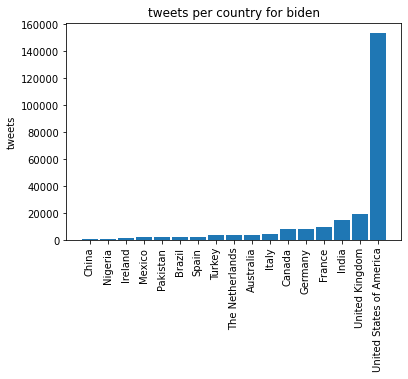

In [105]:
import matplotlib.pyplot as plt
p1 = plt.bar(np.arange(len(country_biden)),list(country_biden.values()),0.9)
plt.ylabel('tweets')
plt.title('tweets per country for biden')
plt.xticks(np.arange(len(country_biden)), country_biden.keys(),rotation='vertical')
plt.show()

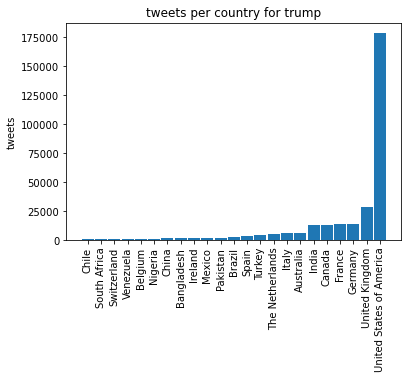

In [106]:
p11 = plt.bar(np.arange(len(country_trump)),list(country_trump.values()),0.9)
plt.ylabel('tweets')
plt.title('tweets per country for trump')
plt.xticks(np.arange(len(country_trump)), country_trump.keys(),rotation='vertical')
plt.show()

In [107]:
state_biden

{'Florida': 13284,
 'Montana': 287,
 'California': 25816,
 'Illinois': 5500,
 'Kentucky': 1196,
 'England': 16742,
 'New York': 21005,
 'Minnesota': 1622,
 'Massachusetts': 3738,
 'Virginia': 2226,
 'Scotland': 1483,
 'Masovian Voivodeship': 90,
 'Indiana': 1552,
 'South Carolina': 1174,
 'Arkansas': 469,
 'Washington': 2112,
 'Georgia': 3186,
 'Hong Kong': 737,
 'Community of Madrid': 1213,
 'Texas': 14191,
 'Ohio': 4413,
 'Alexandria Governorate': 506,
 'Arizona': 3248,
 'Sonora': 157,
 'Sverdlovsk Oblast': 7,
 'Maryland': 2069,
 'New Jersey': 3961,
 'Quebec': 1323,
 'Pennsylvania': 5403,
 'Castile and León': 26,
 'North Carolina': 3054,
 'Ontario': 4492,
 'Louisiana': 1022,
 'Utah': 813,
 'New South Wales': 1805,
 'Missouri': 1773,
 'Tennessee': 1993,
 'Attica': 533,
 'Baden-Württemberg': 690,
 'Wyoming': 238,
 'Limburg': 1594,
 'Zurich': 314,
 'Provincia San José': 97,
 'Oregon': 2250,
 'District of Columbia': 7055,
 'Oklahoma': 806,
 'New Mexico': 446,
 'British Columbia': 1471,
 

**finding correlation between winning in particular state with no. of tweets from that state**

In [108]:
#1 for winning, 0 for losing in that state for biden
biden_won_states = {'Georgia':1, 'Arizona':1,'Florida':0,'Iowa':0,'Michigan':1,'Nevada':1,'New Hampshire':1,
                   'North Carolina':0,'Ohio':0,'Pennsylvania':1,'Texas':0,'Wisconsin':1,'Washington':1,
                   'Idaho':0,'Oregon':1,'Utah':0,'New Mexico':1,'Oklahoma':0,'Nebraska':0,
                   'Wyoming':0,'Montana':0,'North Dakota':0,'South Dakota':0,'Minnesota':1,'Illinois':1,
                   'Indiana':0,'West Virginia':0,'Virginia':1,'Maine':1,'Massachusetts':1,'Alabama':0,
                   'Mississippi':0,'Lousiana':0,'Michigan':1,'South Carolina':0,'Maryland':1,
                    'District Of Columbia':1,'Delaware':1,'New Jersey':1,'Connecticut':1,'Rhode Island':1,
                   'Vermont':1,'Arkansas':0,'Kansas':0,'Missouri':0,'Tennessee':0,'Kentucky':0}
st_x = [] #stores number of tweets from each state
st_y = [] #stores 1 for winning, 0 for losing in each state
for i in state_biden.keys():
    if i in biden_won_states.keys():
        st_x.append(state_biden.get(i))
        st_y.append(biden_won_states.get(i))
print(st_x)
print(st_y)
corr = np.corrcoef(st_x,st_y) #correlation b/w tweets and winning in particular state
print(corr)

[13284, 287, 5500, 1196, 1622, 3738, 2226, 1552, 1174, 469, 2112, 3186, 14191, 4413, 3248, 2069, 3961, 5403, 3054, 813, 1773, 1993, 238, 2250, 806, 446, 3074, 374, 2233, 864, 367, 404, 1657, 289, 878, 888, 572, 381, 331, 317, 228, 265, 234, 86]
[0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0]
[[1.00000000e+00 2.74521508e-04]
 [2.74521508e-04 1.00000000e+00]]


**As you can see we got very less value for corr b/w tweets and winning. Now we'll try using vote percent instead of 0/1 and see the corr b/w tweets and vote percent**

In [109]:
#vote percent of biden in each state
biden_won_states_percent = {'Georgia':49.5, 'Arizona':49.4,'Florida':47.9,'Iowa':45.0,'Michigan':50.6,'Nevada':50.1,'New Hampshire':52.8,
                   'North Carolina':48.7,'Ohio':45.2,'Pennsylvania':50.0,'Texas':46.5,'Wisconsin':49.6,'Washington':58.4,
                   'Idaho':33.1,'Oregon':56.9,'Utah':37.7,'New Mexico':54.3,'Oklahoma':32.3,'Nebraska':39.4,
                   'Wyoming':26.7,'Montana':40.5,'North Dakota':31.9,'South Dakota':35.6,'Minnesota':52.6,'Illinois':57.4,
                   'Indiana':41.0,'West Virginia':29.7,'Virginia':54.3,'Maine':52.9,'Massachusetts':65.6,'Alabama':36.6,
                   'Mississippi':40.5,'Lousiana':39.9,'Michigan':50.6,'South Carolina':43.4,'Maryland':65.4,
                    'District Of Columbia':92.9,'Delaware':58.8,'New Jersey':57.2,'Connecticut':59.3,'Rhode Island':59.6,
                   'Vermont':66.4,'Arkansas':34.8,'Kansas':41.3,'Missouri':41.3,'Tennessee':37.4,'Kentucky':36.2}
st_x_per = [] #stores tweets count of each state
st_y_per = [] #store vote percent of each state for biden
for i in state_biden.keys():
    if i in biden_won_states_percent.keys():
        st_x_per.append(state_biden.get(i))
        st_y_per.append(biden_won_states_percent.get(i))
print(st_x_per)
print(st_y_per)
corr1 = np.corrcoef(st_x_per,st_y_per)
print(corr1)

[13284, 287, 5500, 1196, 1622, 3738, 2226, 1552, 1174, 469, 2112, 3186, 14191, 4413, 3248, 2069, 3961, 5403, 3054, 813, 1773, 1993, 238, 2250, 806, 446, 3074, 374, 2233, 864, 367, 404, 1657, 289, 878, 888, 572, 381, 331, 317, 228, 265, 234, 86]
[47.9, 40.5, 57.4, 36.2, 52.6, 65.6, 54.3, 41.0, 43.4, 34.8, 58.4, 49.5, 46.5, 45.2, 49.4, 65.4, 57.2, 50.0, 48.7, 37.7, 41.3, 37.4, 26.7, 56.9, 32.3, 54.3, 50.6, 39.4, 50.1, 36.6, 29.7, 33.1, 49.6, 31.9, 59.3, 41.3, 45.0, 52.8, 58.8, 52.9, 66.4, 40.5, 59.6, 35.6]
[[1.         0.19134151]
 [0.19134151 1.        ]]


**we can see we got slightly more correlation using vote percent.**

In [110]:
#deleting some keys with less values or state which are not in USA
for i in list(state_biden):
    if state_biden.get(i)<2000:
        del state_biden[i]
del state_biden['Istanbul']
del state_biden['Berlin']
del state_biden['Maharashtra']
del state_biden['Delhi']
del state_biden['Ontario']
del state_biden['Ile-de-France']
del state_biden['England']

state_biden  = {k: v for k, v in sorted(state_biden.items(), key=lambda item: item[1])} #sorting dict
state_biden

{'Maryland': 2069,
 'Washington': 2112,
 'Virginia': 2226,
 'Nevada': 2233,
 'Oregon': 2250,
 'Colorado': 2687,
 'North Carolina': 3054,
 'Michigan': 3074,
 'Georgia': 3186,
 'Arizona': 3248,
 'Massachusetts': 3738,
 'New Jersey': 3961,
 'Ohio': 4413,
 'Pennsylvania': 5403,
 'Illinois': 5500,
 'District of Columbia': 7055,
 'Florida': 13284,
 'Texas': 14191,
 'New York': 21005,
 'California': 25816}

In [111]:
for i in list(state_trump):
    if state_trump.get(i)<2500:
        del state_trump[i]
del state_trump['Istanbul']
del state_trump['Berlin']
del state_trump['Maharashtra']
del state_trump['Delhi']
del state_trump['Ontario']
del state_trump['Ile-de-France']
del state_trump['England']
del state_trump['North Rhine-Westphalia']
del state_trump['British Columbia']
del state_trump['Scotland']
state_trump  = {k: v for k, v in sorted(state_trump.items(), key=lambda item: item[1])}
state_trump

{'Washington': 2759,
 'Arizona': 2865,
 'Georgia': 2876,
 'Michigan': 3053,
 'Oregon': 3126,
 'North Carolina': 3415,
 'Colorado': 3618,
 'Ohio': 3871,
 'Massachusetts': 4719,
 'New Jersey': 5045,
 'Illinois': 6777,
 'Pennsylvania': 7011,
 'District of Columbia': 9684,
 'Texas': 16491,
 'Florida': 16567,
 'New York': 22881,
 'California': 31148}

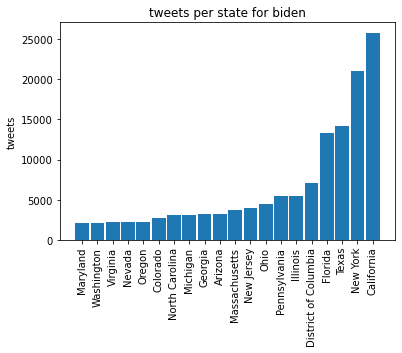

In [112]:
p2 = plt.bar(np.arange(len(state_biden)),list(state_biden.values()),0.9)
plt.ylabel('tweets')
plt.title('tweets per state for biden')
plt.xticks(np.arange(len(state_biden)), state_biden.keys(),rotation='vertical')
plt.show()

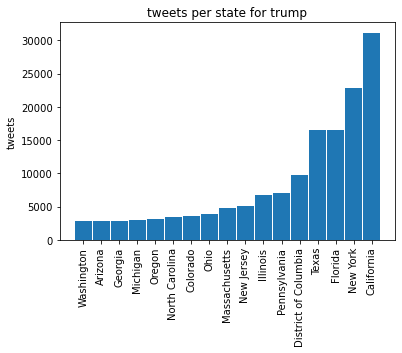

In [113]:
p3 = plt.bar(np.arange(len(state_trump)),list(state_trump.values()),0.9)
plt.ylabel('tweets')
plt.title('tweets per state for trump')
plt.xticks(np.arange(len(state_trump)), state_trump.keys(),rotation='vertical')
plt.show()

**deleting unuseful keys of continent dict**

In [114]:
for i in list(continent_biden):
    if continent_biden.get(i)<100:
        del continent_biden[i]
continent_biden  = {k: v for k, v in sorted(continent_biden.items(), key=lambda item: item[1])}
continent_biden

{'Africa': 3628,
 'Oceania': 4275,
 'South America': 6238,
 'Asia': 23721,
 'Europe': 57442,
 'North America': 164884}

In [115]:
for i in list(continent_trump):
    if continent_trump.get(i)<100:
        del continent_trump[i]
continent_trump  = {k: v for k, v in sorted(continent_trump.items(), key=lambda item: item[1])}
continent_trump

{'Africa': 4798,
 'Oceania': 6811,
 'South America': 7653,
 'Asia': 23450,
 'Europe': 82311,
 'North America': 195584}

**Plotting percentage of tweets from diff continents**

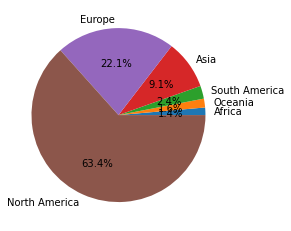

In [116]:
#for biden
plt.pie([v for v in continent_biden.values()],labels = [k for k in continent_biden.keys()],autopct='%1.1f%%')
plt.show()

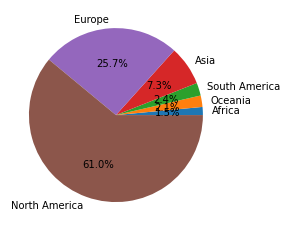

In [117]:
#for trump
plt.pie([v for v in continent_trump.values()],labels = [k for k in continent_trump.keys()],autopct='%1.1f%%')
plt.show()

# Sentiment analysis

Combining all text from tweets into single string

In [118]:
text_biden = " ".join(biden.tweet)
len(text_biden)

44168340

**dividing large text into lists each containing 10000 chars**

In [119]:
n = 10000
text_list_biden = [text_biden[i:i+n] for i in range(0, len(text_biden), n)]


In [120]:
len(text_list_biden) #total lists each containing 10000 chars

4417

In [121]:
text_trump = " ".join(trump.tweet)
n = 10000
text_list_trump = [text_trump[i:i+n] for i in range(0, len(text_trump), n)]
len(text_list_trump)

5702

In [122]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()
scores_biden = {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0}
#compound for overall sentiment
for i in range(1000): #we're analysing only 1000 list for saving time instead of ~5000
    score = sid.polarity_scores(text_list_biden[0]) #sentiment score of each list
    #adding this score to total score
    scores_biden['compound'] = scores_biden['compound'] + score['compound']
    scores_biden['neg'] = scores_biden['neg'] + score['neg']
    scores_biden['neu'] = scores_biden['neu'] + score['neu']
    scores_biden['pos'] = scores_biden['pos'] + score['pos']
#since we've added scores of 1000 lists 
#divide each score by 1000 to get mean score
scores_biden['compound'] = scores_biden['compound']/1000
scores_biden['neg'] = scores_biden['neg'] /1000
scores_biden['neu'] = scores_biden['neu'] /1000
scores_biden['pos'] = scores_biden['pos'] /1000
scores_biden

{'compound': -0.9783999999999878,
 'neg': 0.0949999999999991,
 'neu': 0.8250000000000123,
 'pos': 0.08100000000000174}

**we got overall sentiment as -0.97 which indicates that mostly tweets are negative rather than positive**

In [123]:
scores_trump = {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0}
for i in range(1000):
    score = sid.polarity_scores(text_list_trump[0])
    scores_trump['compound'] = scores_trump['compound'] + score['compound']
    scores_trump['neg'] = scores_trump['neg'] + score['neg']
    scores_trump['neu'] = scores_trump['neu'] + score['neu']
    scores_trump['pos'] = scores_trump['pos'] + score['pos']
scores_trump['compound'] = scores_trump['compound'] /1000
scores_trump['neg'] = scores_trump['neg'] /1000
scores_trump['neu'] = scores_trump['neu'] /1000
scores_trump['pos'] = scores_trump['pos'] /1000
scores_trump

{'compound': -0.9982999999999793,
 'neg': 0.12000000000000152,
 'neu': 0.813999999999992,
 'pos': 0.06600000000000111}

**we got overall sentiment for trump as -0.99 which is more negative than biden(-0.97) which concludes that people are saying more negative things for trump.
There may be some tweets for #biden in which negative words are meant for trump and vice-versa. 
So we can get more accurate results by considering only those tweets which are only for either biden or trump.
But I think still there'll be more negative tweets for trump ;)**